In [1]:
interface_training = []
solution_training = []
target_training = []

In [2]:
import torch
import csv

def csv_to_list(csv_reader_object, list_object):
    for row in csv_reader_object:
        full_row = []
        for i in range(4):
            col = row[i].replace('(', '')
            col = col.replace(')', '')
            col = col.replace(',', ' ')
            col = col.split()
            full_row += [float(col[j]) for j in range(2)]
        list_object += [full_row]
        
if torch.is_tensor(interface_training):
    interface_training = interface_training.tolist()
    
if torch.is_tensor(solution_training):
    solution_training = solution_training.tolist()
    
if torch.is_tensor(target_training):
    target_training = target_training.tolist()

        
with open('training_data/interface_1_0_1_training.csv') as csvdatei4:
    csv_reader_object4 = csv.reader(csvdatei4, delimiter=';')
    csv_to_list(csv_reader_object4, interface_training)
        
        
with open('training_data/solution_1_1_training.csv') as csvdatei5:
    csv_reader_object5 = csv.reader(csvdatei5, delimiter=';')
    csv_to_list(csv_reader_object5, solution_training)
        
        
with open('training_data/interface_0_1_4_training.csv') as csvdatei6:
    csv_reader_object6 = csv.reader(csvdatei6, delimiter=';')
    csv_to_list(csv_reader_object6, target_training)
        
interface_training = torch.Tensor(interface_training)
#print(interface)

solution_training = torch.Tensor(solution_training)
#print(solution)

inp_training = torch.cat((interface_training, solution_training), 1)
#inp = solution
print(inp_training.size())

target_training = torch.Tensor(target_training)
#target += interface
print(target_training.size())
#print(inp)

torch.Size([592, 16])
torch.Size([592, 8])


In [3]:
interface_test = []
solution_test = []
target_test = []

with open('training_data/interface_1_0_1_test.csv') as csvdatei4:
    csv_reader_object4 = csv.reader(csvdatei4, delimiter=';')
    csv_to_list(csv_reader_object4, interface_test)
        
        
with open('training_data/solution_1_1_test.csv') as csvdatei5:
    csv_reader_object5 = csv.reader(csvdatei5, delimiter=';')
    csv_to_list(csv_reader_object5, solution_test)
        
        
with open('training_data/interface_0_1_4_test.csv') as csvdatei6:
    csv_reader_object6 = csv.reader(csvdatei6, delimiter=';')
    csv_to_list(csv_reader_object6, target_test)
        
interface_test = torch.Tensor(interface_test)
#print(interface_test)

solution_test = torch.Tensor(solution_test)
#print(solution_test)

inp_test = torch.cat((interface_test, solution_test), 1)
#inp_test = solution_test
print(inp_test.size())

target_test = torch.Tensor(target_test)
#target_test += interface_test
print(target_test.size())
#print(inp_test)

torch.Size([16, 16])
torch.Size([16, 8])


In [4]:
import torch.nn as nn
import torch.nn.functional as F

class Maxwell(nn.Module): 
    def __init__(self): 
        super(Maxwell, self).__init__()
        self.lin1 = nn.Linear(16, 500) 
        self.lin2 = nn.Linear(500, 8) 
        
    def forward(self, x): 
        x = torch.sigmoid(self.lin1(x)) 
        #x = F.relu(self.lin1(x))
        x = self.lin2(x) 
        return x
            
net = Maxwell() 
print(net)

Maxwell(
  (lin1): Linear(in_features=16, out_features=500, bias=True)
  (lin2): Linear(in_features=500, out_features=8, bias=True)
)


In [5]:
import torch.optim as optim
import time

start_time = time.time()

tol = 3e-3
max_iter = 50000
iterations = 0 
loss_test = tol + 1

optimizer = optim.Adam(net.parameters(), lr=1e-5) 
criterion = nn.MSELoss()

while(iterations < max_iter and loss_test > tol):
    
    out = net(inp_training)

    optimizer.zero_grad()
    loss = criterion(out, target_training) 
    loss_test = criterion(net(inp_test), target_test)
    if(iterations % 1000 == 0):
        print("Loss: %.5f" % loss, "Test-Loss: %.5f" % loss_test, "Iterations: %.0f" % iterations)

    loss.backward() 
    optimizer.step() 
    iterations += 1

print("Final Loss: %.5f" % loss_test) 

print("Number of iterations: %.0f" % iterations)

time_taken = time.time() - start_time
print("Run-Time: %.4f s" % time_taken)

Loss: 1.09217 Test-Loss: 4.42242 Iterations: 0
Loss: 0.58326 Test-Loss: 2.10513 Iterations: 1000
Loss: 0.52147 Test-Loss: 1.86774 Iterations: 2000
Loss: 0.43435 Test-Loss: 1.54092 Iterations: 3000
Loss: 0.32685 Test-Loss: 1.13888 Iterations: 4000
Loss: 0.22167 Test-Loss: 0.74406 Iterations: 5000
Loss: 0.14265 Test-Loss: 0.44474 Iterations: 6000
Loss: 0.09188 Test-Loss: 0.25056 Iterations: 7000
Loss: 0.05781 Test-Loss: 0.12207 Iterations: 8000
Loss: 0.03626 Test-Loss: 0.04738 Iterations: 9000
Loss: 0.02625 Test-Loss: 0.01999 Iterations: 10000
Loss: 0.02242 Test-Loss: 0.01527 Iterations: 11000
Loss: 0.01993 Test-Loss: 0.01474 Iterations: 12000
Loss: 0.01734 Test-Loss: 0.01415 Iterations: 13000
Loss: 0.01453 Test-Loss: 0.01326 Iterations: 14000
Loss: 0.01164 Test-Loss: 0.01214 Iterations: 15000
Loss: 0.00886 Test-Loss: 0.01085 Iterations: 16000
Loss: 0.00640 Test-Loss: 0.00944 Iterations: 17000
Loss: 0.00440 Test-Loss: 0.00798 Iterations: 18000
Loss: 0.00293 Test-Loss: 0.00656 Iterations:

Text(0.5, 0, 'Nummerierung i der Input-Target-Paare')

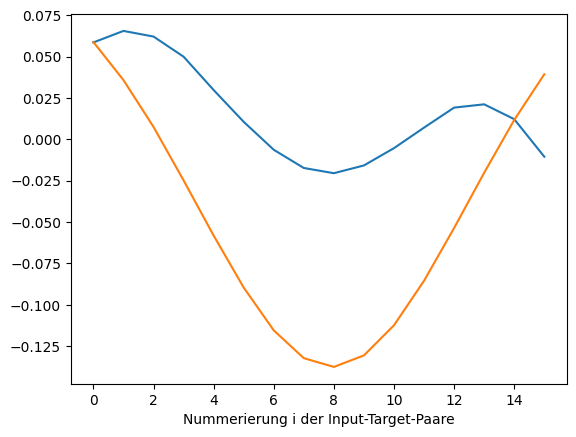

In [12]:
import matplotlib.pyplot as plt

interface_switched = []
with open('training_data/interface_1_0_1_training.csv') as csvdatei1:
    csv_reader_object1 = csv.reader(csvdatei1, delimiter=';')
    csv_to_list(csv_reader_object1, interface_switched)
    
with open('training_data/interface_0_1_1_training.csv') as csvdatei2:
    csv_reader_object2 = csv.reader(csvdatei2, delimiter=';')
    csv_to_list(csv_reader_object2, interface_switched)
    
interface_switched = torch.Tensor(interface_switched)

interface_switched_test = []
with open('training_data/interface_1_0_1_test.csv') as csvdatei3:
    csv_reader_object3 = csv.reader(csvdatei3, delimiter=';')
    csv_to_list(csv_reader_object3, interface_switched_test)
    
with open('training_data/interface_0_1_1_test.csv') as csvdatei4:
    csv_reader_object4 = csv.reader(csvdatei4, delimiter=';')
    csv_to_list(csv_reader_object4, interface_switched_test)

interface_switched_test = torch.Tensor(interface_switched_test)

g01_1_training = []
with open('training_data/interface_0_1_1_training.csv') as csvdatei5:
    csv_reader_object5 = csv.reader(csvdatei5, delimiter=';')
    csv_to_list(csv_reader_object5, g01_1_training)
    
g01_1_training = torch.Tensor(g01_1_training)

g01_1_test = []
with open('training_data/interface_0_1_1_test.csv') as csvdatei6:
    csv_reader_object6 = csv.reader(csvdatei6, delimiter=';')
    csv_to_list(csv_reader_object6, g01_1_test)
    
g01_1_test = torch.Tensor(g01_1_test)


n1 = 0
n2 = target_training.size()[0]
n3 = target_test.size()[0]

x1 = [i for i in range(n2)]
y11 = [target_training.tolist()[i][n1] for i in range(n2)]
y12 = [(net(inp_training) - target_training).tolist()[i][n1] for i in range(n2)]
#y13 = [(interface_switched - target).tolist()[i][n1] for i in range(n2)]
y13 = [(interface_training - target_training).tolist()[i][n1] for i in range(n2)]
y14 = [(g01_1_training - target_training).tolist()[i][n1] for i in range(n2)]

x2 = [i for i in range(n3)]
y21 = [target_test.tolist()[i][n1] for i in range(n3)]
y22 = [(net(inp_test) - target_test).tolist()[i][n1] for i in range(n3)]
#y23 = [(interface_switched_test - target_test).tolist()[i][n1] for i in range(n3)]
y23 = [(interface_test - target_test).tolist()[i][n1] for i in range(n3)]
y24 = [(g01_1_test - target_test).tolist()[i][n1] for i in range(n3)]
#print(x)


#plt.plot(x1, y12)
#plt.plot(x1, y14)
#plt.plot(x1, y11)

plt.plot(x2, y22)
plt.plot(x2, y24)
#plt.plot(x2, y21)

plt.xlabel("Nummerierung i der Input-Target-Paare")

In [8]:
interface = []
solution = []

with open('KirasFM-NN/interface_1_0_1.csv') as csvdatei1:
    csv_reader_object1 = csv.reader(csvdatei1, delimiter=';')
    csv_to_list(csv_reader_object1, interface)        
        
with open('KirasFM-NN/solution_1_1.csv') as csvdatei2:
    csv_reader_object2 = csv.reader(csvdatei2, delimiter=';')
    csv_to_list(csv_reader_object2, solution)
    
interface = torch.Tensor(interface)
solution = torch.Tensor(solution)
inp = torch.cat((interface, solution), 1)
print(inp.size())

out_list = net(inp).tolist()

with open('KirasFM-NN/interface_0_1_nn.csv', 'w') as interface_0_1_nn:
    writer = csv.writer(interface_0_1_nn, delimiter=';', escapechar=' ', quoting=csv.QUOTE_NONE)
    
    for i in range(len(out_list)):
        row = []
        for j in range(4):
            row += [(out_list[i][2*j],out_list[i][2*j+1]),'(0,0)']
        row += ' '
        writer.writerow(row)

torch.Size([16, 16])
